# SciPy and NumPy Cheat Sheet
The main libraries in Python are NumPy, SciPy, Matplotlib and Pandas
NumPy provides homogeneous multidimensional arrays, SciPy provides functions and operators for mathematical computation
Matplotlib can be used to plot functions and Pandas is used for non-homogeneous data manipulation and reading and writing files.

In [115]:
%matplotlib inline

## Python List
### Unidimensional list

In [116]:
alist = [1,2,5]
print(alist) # prints the list
print(alist[0]) # prints the 1st element of the list

[1, 2, 5]
1


### Bi-dimensional list

In [117]:
alist2d = [[1,2],[3,4]]
print(alist2d)
alist2d[0][0]

[[1, 2], [3, 4]]


1

## NumPy 
### Arrays
Arrays can contain elements of the same types: integers, float

### Let's import the NumPy library

In [118]:
import numpy as np

### Unidimensional array

In [119]:
array = np.array((1,2,4))
print(array)  # prints the full array
print(array[0]) # prints the 1st element of the array

[1 2 4]
1


In [120]:
arange = np.arange(0,9,1) # an array from 0 to 9 with increment 1
print(arange)

[0 1 2 3 4 5 6 7 8]


### Bi-dimensional array

In [121]:
array2d = np.array(((1,2,3),(4,5,6),(7,8,9)))
print(array2d) # prints the 2D array
print(array2d[1,1]) # prints the element in the 2nd row and 2nd column
print(array2d.ndim) # rank of the array 
print(array2d.shape) 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
5
2
(3L, 3L)


In [122]:
zeros2d = np.zeros((2,2))
print(zeros2d)

[[ 0.  0.]
 [ 0.  0.]]


In [123]:
# reshaping
dataarray = np.array((1,2,3,4,5,6,7,8,9))
print(dataarray)
dataarray2d = dataarray.reshape(3,3) # this is the same array but represented as a 3x3 matrix
print(dataarray2d)
dataarray2d[1,1] = 0  # changes the value of the element (1,1), i.e the 5th element with index 4
print(dataarray)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 0 6 7 8 9]


## Record array
A record array can contain objects of different types in different colums, e.g. all integers in a column and all strings in another column

In [124]:
recarray = np.zeros((2,), dtype=[('Integers','i4'),('Float','f4'),('Strings','a10')]) # a record array of two empty records (dtype is optional)
print(recarray)

[(0, 0.0, '') (0, 0.0, '')]


In [125]:
# prepare three arrays each of the same type: integer, float, string
column1 = np.array((1,2))
column2 = np.array((1.5,2.5))
column3 = np.array(('Rome','Paris'))
data = zip(column1,column2,column3) # puts together the three arrays in a record array 
recarray[:] = data # copy the record array
print(recarray[:])
print(recarray[0])

[(1, 1.5, 'Rome') (2, 2.5, 'Paris')]
(1, 1.5, 'Rome')


In [126]:
# another way of creating a record array
recarray2 = np.rec.array([(1,1.5,'New York'),(2,3.7,'Moscow')],dtype=[('Integers','i4'),('Float','f4'),('Strings','a10')])
print(recarray2.Strings) # prints all the values in column 'Strings'

['New York' 'Moscow']


## Read & Write
Pandas works much better than NumPy in reading and writing files

In [127]:
import pandas as pd
path = 'data/sale-orders/version-2/ATN-Sales-Orders-v2-20170705-Sheet-1.csv'
df = pd.read_csv(path)
df[124:126]

C:\Users\lselmi\AppData\Local\Continuum\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FamilyId_Flight,FamilyPath_Flight,GUID_Family_Flight,ComponentNumber_MAT_Flight,PartNumber_MAT_Flight,MaterialText_MAT_Flight,TechnologyCharact_MAT_Flight,GUID_Component,FamilyCode_Flight,GroupCode_Flight,...,PO_Change,POP_DeliveryDate,POP_MfrContinent,POP_MfrCountry,LT_PODate_DeliveryDate,POP_Qty,POP_QtyBase,POP_QtyUnit,POP_UnitPrice_CU,LineComment
124,135,Microcircuits/Linear/Converter/DC to DC,NaN,10060SC*B,NaN,ASA2815D/CH DIL-8,"MICROCIRCUIT, HYBRID, LINEAR,+/- 15 VOLT, DUAL...",NaN,NaN,NaN,...,"1,09",20161125,North America,EE.UU.,267,1,1,SER,1500,NaN
125,135,Microcircuits/Linear/Converter/DC to DC,NaN,10060SC*B,NaN,ASA2815D/CH DIL-8,"MICROCIRCUIT, HYBRID, LINEAR,+/- 15 VOLT, DUAL...",NaN,NaN,NaN,...,"1,09",20160912,North America,EE.UU.,193,1,1,SER,1000,NaN


## Linear Algebra

In [128]:
# Solve the linear system AX = B
A = np.array([[3, 6, -5],   
[1, -3, 2],
[5, -1, 4]])

B = np.array([[12],
[-2],
[10]])

Ainv = np.linalg.inv(A) # inverse of A

X = Ainv.dot(B)  # X = A^(-1)B
print(X)

print(A.dot(X)) # returns B

[[ 1.75]
 [ 1.75]
 [ 0.75]]
[[ 12.]
 [ -2.]
 [ 10.]]


In [129]:
# Determinant of a squared matrix
#     1 2 3
# S = 0 2 1
#     0 0 -1

S = np.array([[1,2,3],
              [0,2,1],
              [0,0,-1]])
det = np.linalg.det(S)
print(det)
l = np.linalg.eigvals(S) # eigenvalues
print(l)

-2.0
[ 1.  2. -1.]


## Histograms

(array([ 0.0013313 ,  0.        ,  0.        ,  0.0013313 ,  0.0026626 ,
         0.        ,  0.0013313 ,  0.0053252 ,  0.0026626 ,  0.0026626 ,
         0.0079878 ,  0.0066565 ,  0.0013313 ,  0.0039939 ,  0.01331299,
         0.0079878 ,  0.01730689,  0.01730689,  0.02130079,  0.02263209,
         0.03594508,  0.02130079,  0.03195118,  0.04925807,  0.07055886,
         0.05458327,  0.08919705,  0.08786575,  0.08919705,  0.13046732,
         0.10916654,  0.12381083,  0.13312992,  0.18105669,  0.18904449,
         0.21700177,  0.19969488,  0.23963386,  0.26625984,  0.25694075,
         0.29421713,  0.3341561 ,  0.3354874 ,  0.30353622,  0.38341417,
         0.3408126 ,  0.39140197,  0.39539587,  0.41536536,  0.39672717,
         0.40604626,  0.39539587,  0.40338366,  0.39672717,  0.36477599,
         0.41137146,  0.36743858,  0.36743858,  0.35811949,  0.31285532,
         0.27691024,  0.25960335,  0.31818051,  0.21300787,  0.22365827,
         0.21167658,  0.19570098,  0.22099567,  0.1

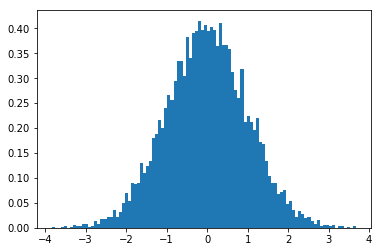

In [130]:
import matplotlib.pyplot as plt
mu, sigma = 0.0, 1.0  # mean value and standard deviation
sample_size = 10000
v = np.random.normal(mu,sigma, sample_size) # Normal distribution
plt.figure()
plt.hist(v, bins=100, normed=1)

# SciPy
Let's import the SciPy library and the Matplotlib library for visualization

In [131]:
from scipy.optimize import curve_fit

## Linear fitting

[ 0.9697417   1.97051613]


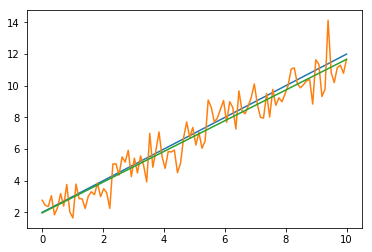

In [132]:
# Creating a linear function to model and create data
def linearfunc(x, a, b):
    return a * x + b

x = np.linspace(0, 10, 100) # start = 0, stop = 0, samples = 100
y = linearfunc(x, 1, 2) # linear function defined in [0,10]
plt.figure()
plt.plot(x, y)
# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))
plt.plot(x,yn)
# Executing curve_fit on noisy data
popt, pcov = curve_fit(linearfunc, x, yn) # estimates the parameters of the linear function a, b
print(popt)
yfit = linearfunc(x,popt[0],popt[1]) # the fitted linear function overlaps with the original one
plt.plot(x,yfit)

## Gaussian fitting

[ 0.99925046  4.97956601  2.12654011]


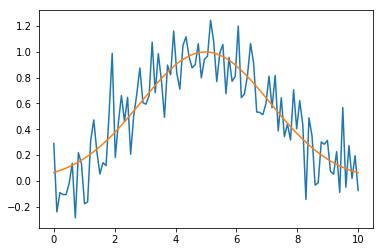

In [133]:
# Creating a Gaussian function to model and create data
def gaussfunc(x, a, b, c):
    return a*np.exp(-(x-b)**2/(2*c**2))

# Generating clean data
x = np.linspace(0, 10, 100)
y = gaussfunc(x, 1, 5, 2)

# Adding noise (gaussian) to the data (also gaussian)
yn = y + 0.2 * np.random.normal(size=len(x))
plt.figure()
plt.plot(x,yn) # plot the gaussian function with random noise - red color
# Executing curve_fit on noisy data
popt, pcov = curve_fit(gaussfunc, x, yn) # estimates the parameters of the gaussian function a, b, c
print(popt)
yfit = gaussfunc(x,popt[0],popt[1],popt[2]) # plot the fitted gaussian
plt.plot(x,yfit)

## Solve equations

In [134]:
from scipy.optimize import fsolve
curve = lambda x: (x - 1)*(x - 2)
solution1 = fsolve(curve, 0)
print solution1
solution2 = fsolve(curve,3)
print solution2

[ 1.]
[ 2.]


## Univariate interpolation

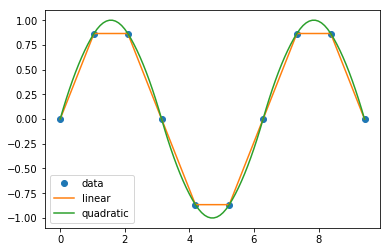

In [135]:
from scipy.interpolate import interp1d
x = np.linspace(0, 3*np.pi, 10)
y = np.sin(x)

# create a linear interpolation function
linearfunc = interp1d(x, y, kind='linear')
# create a quadratic interpolation function
quadraticfunc = interp1d(x, y, kind='quadratic')
# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 3*np.pi, 100)
linear_interp = linearfunc(x_interp)
quadratic_interp = quadraticfunc(x_interp)
# plot the results
plt.figure() # new figure
plt.plot(x, y,'o') # plot the data points
plt.plot(x_interp, linear_interp, x_interp, quadratic_interp); # plot the linear and quadratic interpolations
plt.legend(['data', 'linear', 'quadratic'], loc='best')

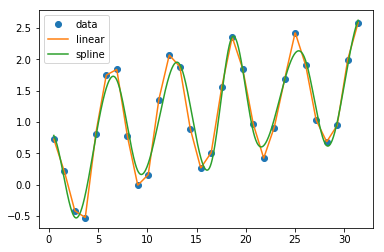

In [136]:
# Interpolation of noisy data
from scipy.interpolate import UnivariateSpline
sample = 30
x = np.linspace(0.5, 10*np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10
linearfunc = interp1d(x, y, kind='linear')
splinefunc = UnivariateSpline(x, y, s=1)
x_interp = np.linspace(0.5, 10*np.pi, 1000)
linear_interp = linearfunc(x_interp)
spline_interp = splinefunc(x_interp)
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_interp, linear_interp, x_interp, spline_interp)
plt.legend(['data', 'linear', 'spline'], loc='best')

## Multivariate Interpolation

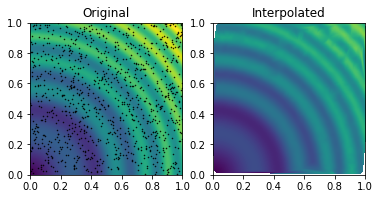

In [162]:
from scipy.interpolate import griddata
def func(x, y):
    return np.sqrt(x**2 + y**2)+np.sin(x**2 + y**2)

# creates a 2D grid of 1000x1000 points with coordinates values from 0 to 5 for both x and y
grid_x, grid_y = np.mgrid[0:5:1000j, 0:5:1000j]  

# sample data points
xy = np.random.rand(1000, 2)
z = func(xy[:,0]*5, xy[:,1]*5)

# interpolating data
grid_z0 = griddata(xy*5, z, (grid_x, grid_y), method='cubic')

plt.subplot(121)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower') # shows the image generated on the grid points 
plt.plot(xy[:,0], xy[:,1], 'k.', ms=1) # print the ramdom sample points
plt.title('Original')

plt.subplot(122)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower') # shows the interpolated image
plt.title('Interpolated')